In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from matplotlib.gridspec import GridSpec

In [2]:
plt.rcParams['image.cmap'] = 'coolwarm'
plt.rcParams.update({'font.size': 12})

In [3]:
def rmse(x, y):
    return np.sqrt(((x - y)**2).mean())

# Load Data

In [4]:
day=90 # 0 90 180 270

In [5]:
ref=np.load('data/ref-'+str(day)+'.npy')
cim_mean=np.load('data/clim-'+str(day)+'.npy')
per=np.load('data/per-'+str(day)+'.npy')
pix=np.load('data/pix-'+str(day)+'.npy')

In [6]:
sm_cli=np.load('data/sm_cli.npy')
sm_per=np.load('data/sm_per.npy')
sm_pix=np.load('data/sm_pix.npy')
sm_pix_mm=np.load('data/sm_pix_mm.npy')
sm_pix_drop=np.load('data/sm_pix_drop.npy')
sm_ref=np.load('data/sm_ref.npy')

In [7]:
cli_rmse=np.load('data/cli_rmse.npy')
per_rmse=np.load('data/per_rmse.npy')
pix_rmse=np.load('data/pix_rmse.npy')
mn_model_rmse=np.load('data/mn_model_rmse.npy')
mn_drop_rmse=np.load('data/mn_drop_rmse.npy')

cli_ssim=np.load('data/cli_ssim.npy')
per_ssim=np.load('data/per_ssim.npy')
pix_ssim=np.load('data/pix_ssim.npy')
mn_model_ssim=np.load('data/mn_model_ssim.npy')
mn_drop_ssim=np.load('data/mn_drop_ssim.npy')

# Plot spatial spread

In [8]:
ex0=-180
ex1=180
ex2=-90
ex3=90

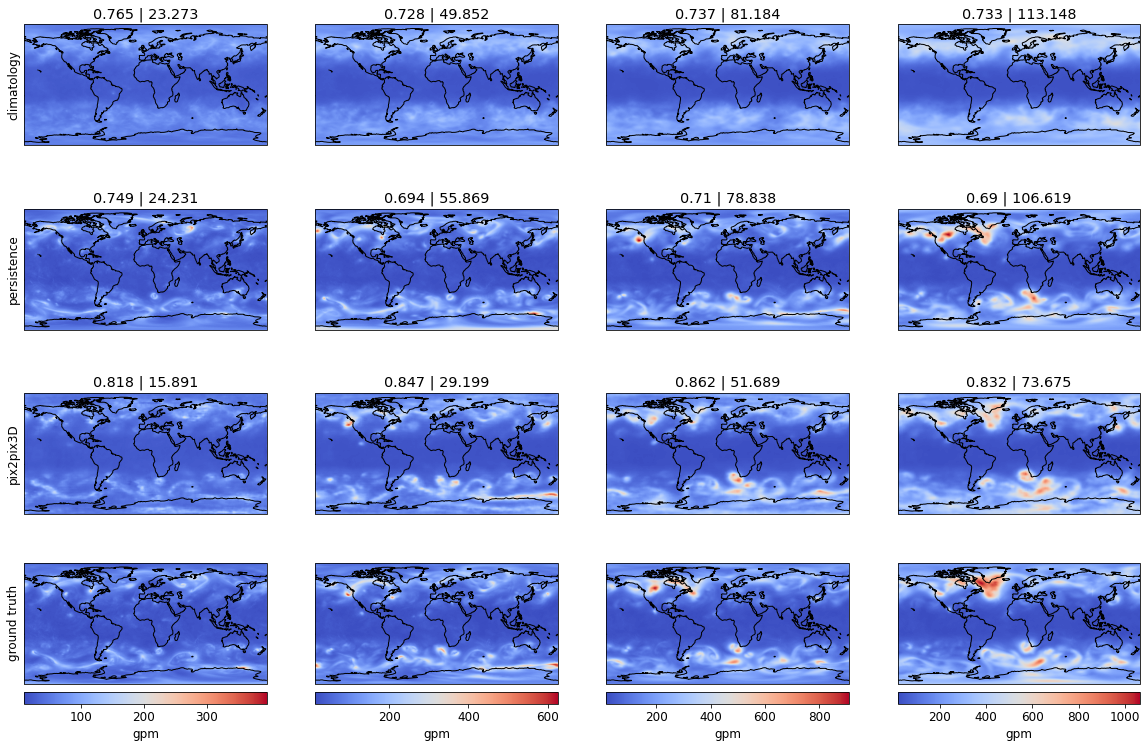

In [10]:
ccc=1
fig=plt.figure(figsize=(20,13))

for tt in [3,7,11,15]:
    mi=ref[tt,:,:].min()
    ma=ref[tt,:,:].max()
    ax=plt.subplot(4,4,ccc,projection=ccrs.PlateCarree())
    ax.coastlines()
    ccc+=1
    ax.imshow(cim_mean[tt,:,:],vmin=mi, vmax=ma,origin='lower',extent=[ex0,ex1,ex2,ex3])

    ax.set_title(str(round(ssim(ref[tt,:,:],cim_mean[tt,:,:], data_range=ma - mi),3))+str(' | ')+str(round(rmse(ref[tt,:,:],cim_mean[tt,:,:]),3)))
    ax.set_xticks([])
    ax.set_yticks([])  
    if tt==3:
        ax.set_ylabel('climatology')

for tt in [3,7,11,15]:
    mi=ref[tt,:,:].min()
    ma=ref[tt,:,:].max()
    ax=plt.subplot(4,4,ccc,projection=ccrs.PlateCarree())
    ax.coastlines()
    ccc+=1
    ax.imshow(per[tt,:,:],vmin=mi, vmax=ma,origin='lower',extent=[ex0,ex1,ex2,ex3])

    ax.set_title(str(round(ssim(ref[tt,:,:],per[tt,:,:], data_range=ma - mi),3))+str(' | ')+str(round(rmse(ref[tt,:,:],per[tt,:,:]),3)))
    ax.set_xticks([])
    ax.set_yticks([])  
    if tt==3:
        ax.set_ylabel('persistence')
    
for tt in [3,7,11,15]:
    mi=ref[tt,:,:].min()
    ma=ref[tt,:,:].max()
    ax=plt.subplot(4,4,ccc,projection=ccrs.PlateCarree())
    ax.coastlines()
    ccc+=1
    ax.imshow(pix[tt,:,:],vmin=mi, vmax=ma,origin='lower',extent=[ex0,ex1,ex2,ex3])

    ax.set_title(str(round(ssim(ref[tt,:,:],pix[tt,:,:], data_range=ma - mi),3))+str(' | ')+str(round(rmse(ref[tt,:,:],pix[tt,:,:]),3)))
    ax.set_xticks([])
    ax.set_yticks([])    
    if tt==3:
        ax.set_ylabel('pix2pix3D')
        
for tt in [3,7,11,15]:
    mi=ref[tt,:,:].min()
    ma=ref[tt,:,:].max()
    ax=plt.subplot(4,4,ccc,projection=ccrs.PlateCarree())
    ax.coastlines()
    ccc+=1
    im=ax.imshow(ref[tt,:,:],vmin=mi, vmax=ma,origin='lower',extent=[ex0,ex1,ex2,ex3])
    plt.colorbar(im,orientation="horizontal",label="gpm",pad=0.05)
    ax.set_xticks([])
    ax.set_yticks([])  
    if tt==3:
        ax.set_ylabel('ground truth')
        
        
#plt.savefig('spread_days.pdf',bbox_inches = 'tight')        

# Plot spread for different cities

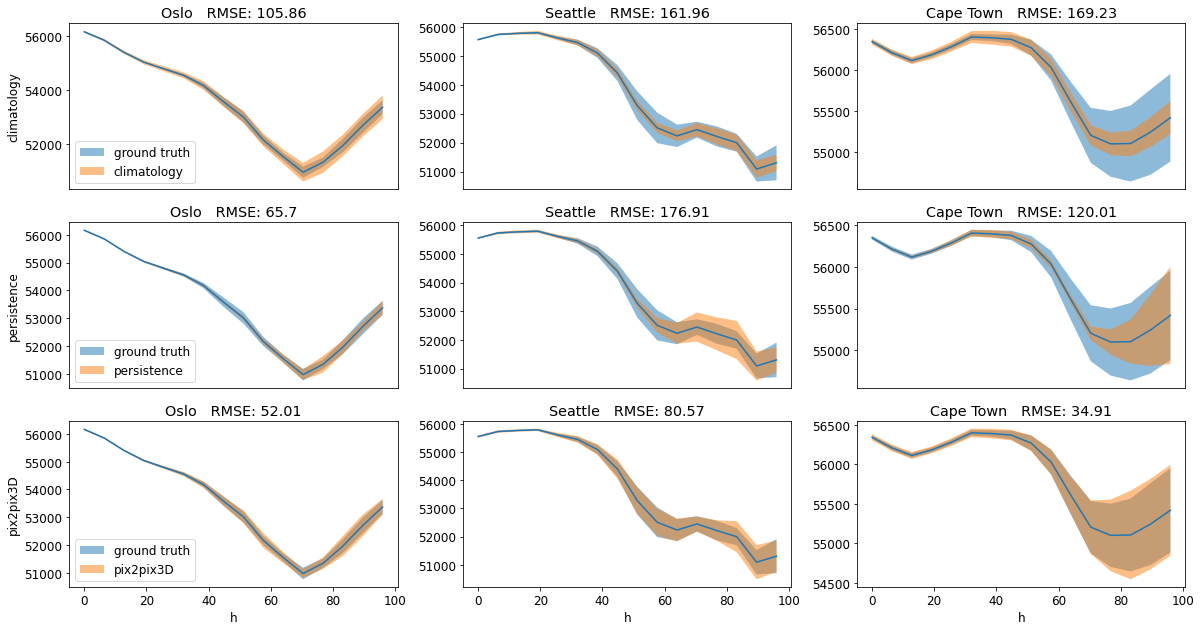

In [12]:
#plt.figure(figsize=(25,30))
plt.figure(figsize=(20,25))



cities =['Oslo','Seattle','Cape Town']
xx=[int(59.911491+90)*2,int( 47.608013+90)*2,int(-33.918861+90)*2]
yy=[int( 10.757933+180)*2,int(-122.335167+180)*2,int(18.423300+180)*2]

cc=1
for j in range(3):
    for i in range(len(xx)):
        plt.subplot(7,3,cc)
        x=xx[i]
        y=yy[i]
        cntr=np.load('data/cf-'+str(day)+str(cities[i][0])+'.npy')
        tm=np.linspace(0,96,16)

        plt.plot(tm,cntr)

        zspread=ref[0:16,x,y]
        plt.fill_between(tm,cntr+zspread,cntr-zspread,alpha=0.5,label='ground truth')
        if j==0:
            zspread=cim_mean[0:16,x,y]
            plt.title(cities[i]+str('   RMSE: ')+str(round(rmse(ref[0:16,x,y],cim_mean[0:16,x,y]),2)))
            plt.fill_between(tm,cntr+zspread,cntr-zspread,alpha=0.5,label='climatology')
            if i==0:
                plt.ylabel('climatology')
                plt.legend(loc=3)
            plt.xticks([])
        if j==1:
            zspread=per[0:16,x,y]
            plt.title(cities[i]+str('   RMSE: ')+str(round(rmse(ref[0:16,x,y],per[0:16,x,y]),2)))
            plt.fill_between(tm,cntr+zspread,cntr-zspread,alpha=0.5,label='persistence')
            plt.xticks([])
            if i==0:
                plt.ylabel('persistence')
                plt.legend(loc=3)
        if j==2:
            zspread=pix[0:16,x,y]
            plt.title(cities[i]+str('   RMSE: ')+str(round(rmse(ref[0:16,x,y],pix[0:16,x,y]),2)))
            plt.fill_between(tm,cntr+zspread,cntr-zspread,alpha=0.5,label='pix2pix3D')
            if i==0:
                plt.ylabel('pix2pix3D')
                plt.legend(loc=3)            
            plt.xlabel('h')

        cc+=1

#plt.savefig('spread_cities.pdf',bbox_inches = 'tight')     

# Plot RMSE, SSIM and Integral spread

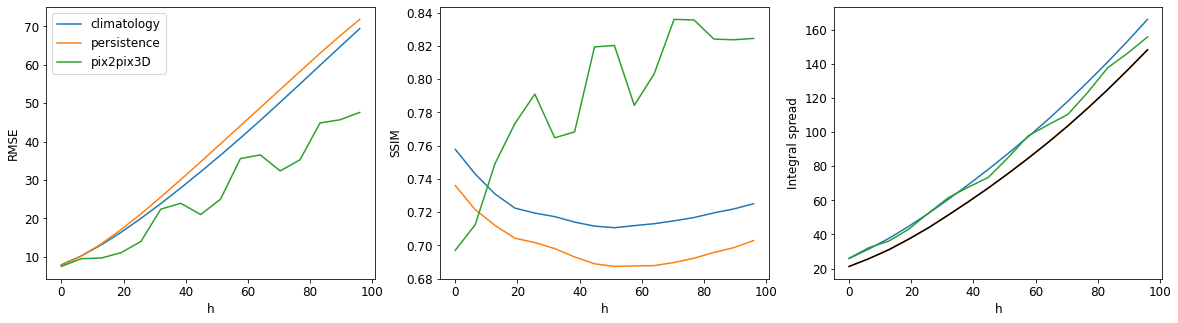

In [59]:
plt.figure(figsize=(20,5))
xx=np.linspace(0,96,16)


plt.subplot(1,3,1)
plt.plot(xx,cli_rmse,label='climatology')
plt.plot(xx,per_rmse,label='persistence')
plt.plot(xx,pix_rmse,label='pix2pix3D')
plt.legend(loc=2)
plt.xlabel('h')
plt.ylabel('RMSE')

plt.subplot(1,3,2)
plt.plot(xx,cli_ssim,label='climatology')
plt.plot(xx,per_ssim,label='persistence')
plt.plot(xx,pix_ssim,label='pix2pix3D')
plt.xlabel('h')
plt.ylabel('SSIM')

plt.subplot(1,3,3)
plt.plot(xx,sm_cli,label='climatology')
plt.plot(xx,sm_per,label='persistence')
plt.plot(xx,sm_pix,label='pix2pix3D')
plt.plot(xx,sm_ref,label='ground truth',color='black')

plt.xlabel('h')
plt.ylabel('Integral spread')
#plt.legend(loc=2)

#plt.savefig('rmse_ssim_si.pdf',bbox_inches = 'tight')

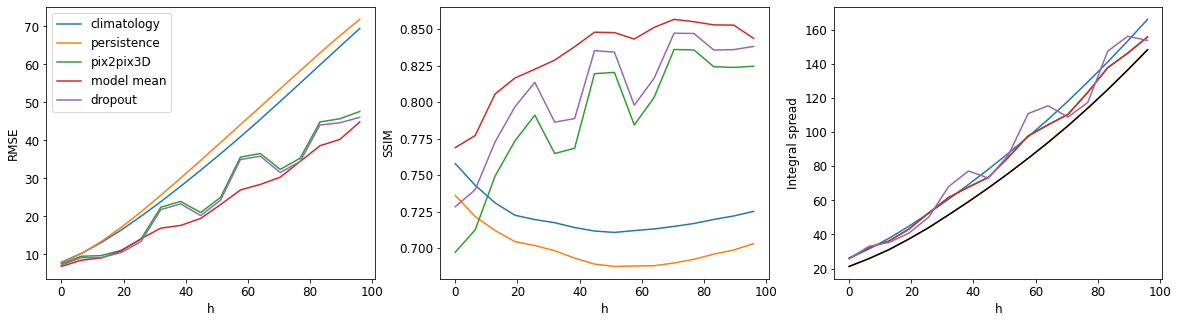

In [60]:
plt.figure(figsize=(20,5))
xx=np.linspace(0,96,16)


plt.subplot(1,3,1)
plt.plot(xx,cli_rmse,label='climatology')
plt.plot(xx,per_rmse,label='persistence')
plt.plot(xx,pix_rmse,label='pix2pix3D')
plt.plot(xx,mn_model_rmse,label='model mean')
plt.plot(xx,mn_drop_rmse,label='dropout')
plt.legend(loc=2)
plt.xlabel('h')
plt.ylabel('RMSE')

plt.subplot(1,3,2)
plt.plot(xx,cli_ssim,label='climatology')
plt.plot(xx,per_ssim,label='persistence')
plt.plot(xx,pix_ssim,label='pix2pix3D')
plt.plot(xx,mn_model_ssim,label='model mean')
plt.plot(xx,mn_drop_ssim,label='dropout')
plt.xlabel('h')
plt.ylabel('SSIM')

plt.subplot(1,3,3)
plt.plot(xx,sm_cli,label='climatology')
plt.plot(xx,sm_per,label='persistence')
plt.plot(xx,sm_pix,label='pix2pix3D')
plt.plot(xx,sm_pix_mm,label='model mean')
plt.plot(xx,sm_pix_drop,label='dropout')

plt.plot(xx,sm_ref,label='ground truth',color='black')

plt.xlabel('h')
plt.ylabel('Integral spread')
#plt.legend(loc=2)

#plt.savefig('rmse_ssim_si_all.pdf',bbox_inches = 'tight')